In [1]:
import surp
import matplotlib.pyplot as plt
import arya 
import numpy as np
import pandas as pd

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the csv summary
    """
    
    file_name = "../../models/" + name + "/stars.csv"
    model =  pd.read_csv(file_name, index_col=0)
    return model

In [15]:
models = {
    "fiducial": find_model("fiducial/run"),
    "lin": find_model("fiducial/sspw_lin"),
    "const": find_model("fiducial/sspw_const"),
    "peaked": find_model("fiducial/sspw_peaked"),
}

Text(0, 0.5, 'subgiant density')

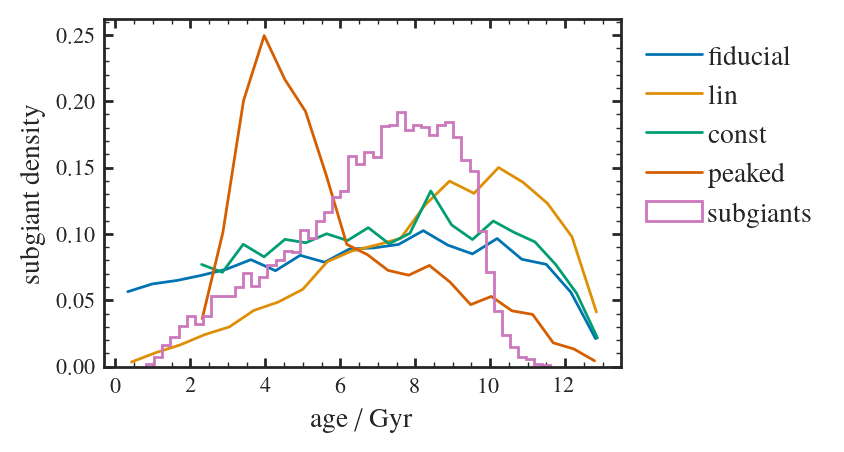

In [16]:
for label, model in models.items():
    x, y = np.histogram(model.age, density=True, bins=20)
    plt.plot((y[1:] + y[:-1])/2, x, label=label)

plt.hist(surp.subgiants.age_ANN, histtype="step", label="subgiants", density=True)
arya.Legend(-1)
plt.xlabel("age / Gyr")
plt.ylabel("subgiant density")

(-1.0, 0.5)

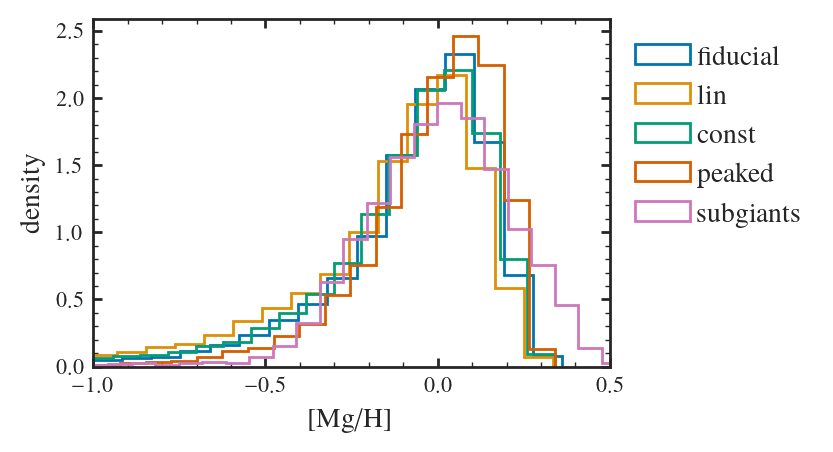

In [17]:
for label, model in models.items():
    plt.hist(model.MG_H, histtype="step", label=label, density=True)

plt.hist(surp.subgiants.MG_H, histtype="step", label="subgiants", density=True)
arya.Legend(-1)
plt.xlabel("[Mg/H]")
plt.ylabel("density")
plt.xlim(-1, 0.5)

In [18]:
import seaborn as sns

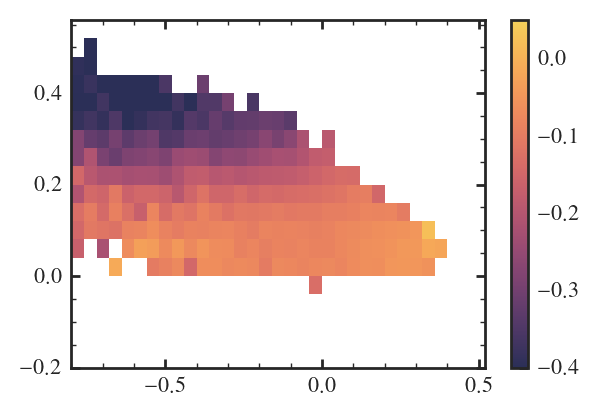

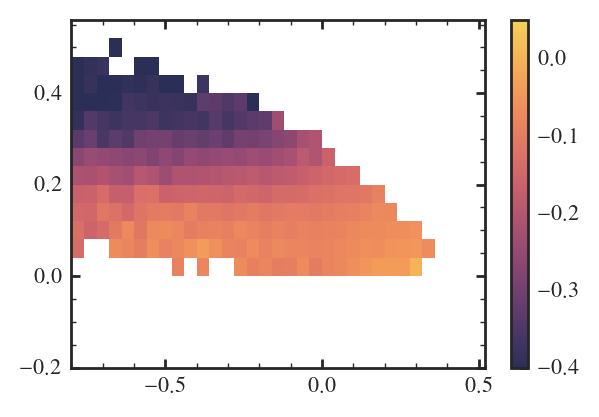

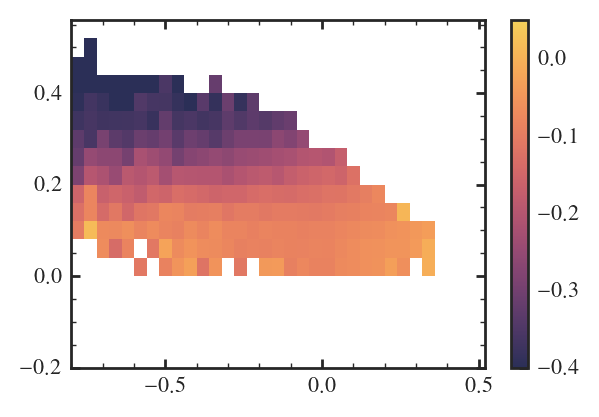

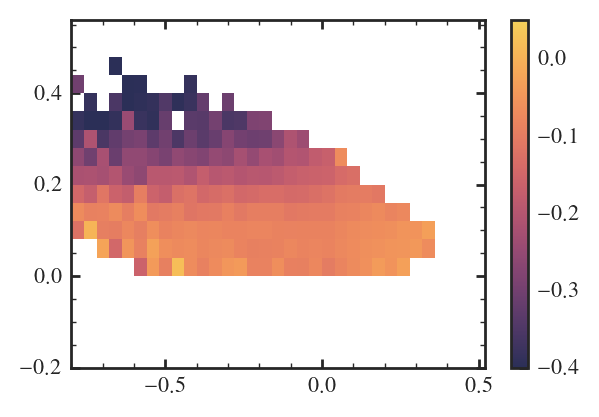

In [31]:
for label, model in models.items():
    from scipy.stats import binned_statistic_2d
    w = 0.04
    bins=(np.arange(-0.8, 0.55, w), np.arange(-0.2, 0.6, w))
    
    stat, xedges, yedges, binnumber = binned_statistic_2d(
        model.MG_H, model.MG_FE, model.C_MG, statistic='mean', bins=bins
    )
    
    fig, ax = plt.subplots()
    pcm = ax.pcolormesh(bins[0], bins[1], stat.T, shading='auto', vmin=-0.4, vmax=0.05)
    
    plt.colorbar(pcm)
    